<a href="https://colab.research.google.com/github/skillacademyonwheels/1.-GettingStarted-with-API/blob/main/CNN_Layers_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical

1. Load Dataset

In [ ]:
# Load MNIST dataset from OpenML (you can also use sklearn's inbuilt datasets)
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
X_train = X_train.reshape(len(X_train), 28, 28, 1)
Y_train = to_categorical(y_train, num_classes=10)

X_test = X_test.reshape(len(X_test), 28, 28, 1)
Y_test = to_categorical(y_test, num_classes=10)

X_train = X_train/255.0
X_test = X_test/255.0

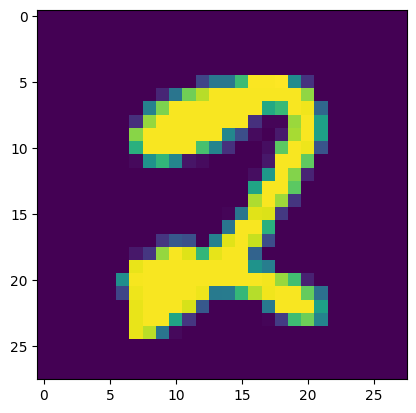

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


2. Model:

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2,2)))

# model.add(Conv2D(32, (3,3), activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

model.add(Flatten())
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 1, batch_size = 64)

938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.8609 - loss: 0.5082


3. Making Predictions

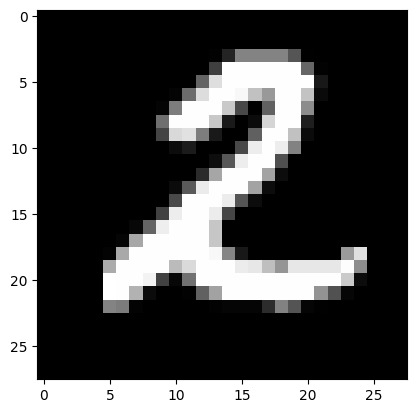

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: 2
Actual class: 2


In [56]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2, :].reshape(28, 28), cmap='gray')
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,28, 28,1))
predicted_value = np.argmax(y_pred)
print(f"Predicted class: {predicted_value}")
print(f"Actual class: {y_test[idx2]}")